# Assignment 1

Breast cancer is the most common malignancy among women, accounting for nearly 1 in 3 cancers diagnosed among women in the United States, and it is the second leading cause of cancer death among women. Breast cancer occurs as a results of abnormal growth of cells in the breast tissue, commonly referred to as a Tumor. A tumor does not mean cancer - tumors can be benign (patient doesn't have breast cancer) or malignant (patient has breast cancer). Tests such as MRI, mammogram, ultrasound and biopsy are commonly used to diagnose breast cancer performed.


In this assignment, you will be analyzing ultrasound data of breast cancer tumors. Several characteristics of the tumor are given in the dataset and you will create a model that will predict whether or not a patient has a positive breast cancer diagnosis based off of the tumor characteristics.

This data set contains the following features:

* id (patientid)
* name
* radius (the distance from the center to the circumference of the tumor)
* texture (standard deviation of gray-scale values)
* perimeter (circumference of the tumor, approx. 2*3.14 *radius)
* area
* smoothness (local variation in radius lengths)
* compactness
* concavity (severity of concave portions of the contour)
* symmetry
* fractal_dimension
* age
* diagnosis: 0 or 1 indicating whether patient has breast cancer or not




## Library and Data Import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
bcd = pd.read_csv("breastcancer.csv") #bcd means breastcancerdata

In [4]:
bcd.head()

,id,name,radius,texture,perimeter,area,smoothness,compactness,concavity,symmetry,fractal_dimension,age,diagnosis
0,ID842302,Glynnis Munson,NaN,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.2419,0.07871,35,1
1,ID842517,Lana Behrer,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.1812,0.05667,27,1
2,ID84300903,Devondra Vanvalkenburgh,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.2069,0.05999,31,1
3,ID84348301,Glory Maravalle,NaN,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.2597,0.09744,49,1
4,ID84358402,Mellie Mccurdy,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.1809,0.05883,20,1


In [5]:
bcd.isnull()

,id,name,radius,texture,perimeter,area,smoothness,compactness,concavity,symmetry,fractal_dimension,age,diagnosis
0,False,False,True,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,False,False,False
565,False,False,False,False,False,False,False,False,False,False,False,False,False
566,False,False,False,False,False,False,False,False,False,False,False,False,False
567,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
bcd.isnull().sum()
bcd.isna().sum()

id                    0
name                  0
radius               71
texture               0
perimeter             0
area                  0
smoothness            0
compactness           0
concavity             0
symmetry              0
fractal_dimension     0
age                   0
diagnosis             0
dtype: int64

## Exploratory Data Analysis through Visualizations


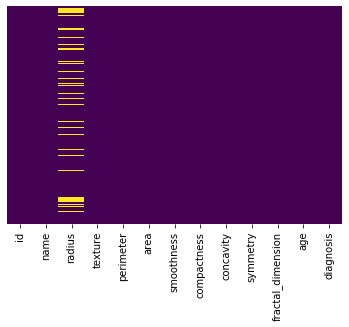

In [7]:
sns.heatmap(bcd.isnull(),yticklabels=False,cbar=False,cmap="viridis")

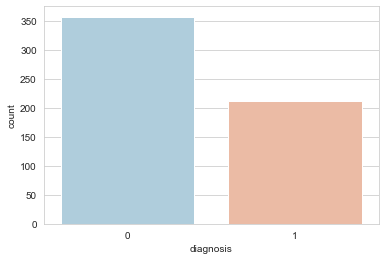

In [8]:
sns.set_style("whitegrid")
sns.countplot(x='diagnosis',data=bcd,palette='RdBu_r')

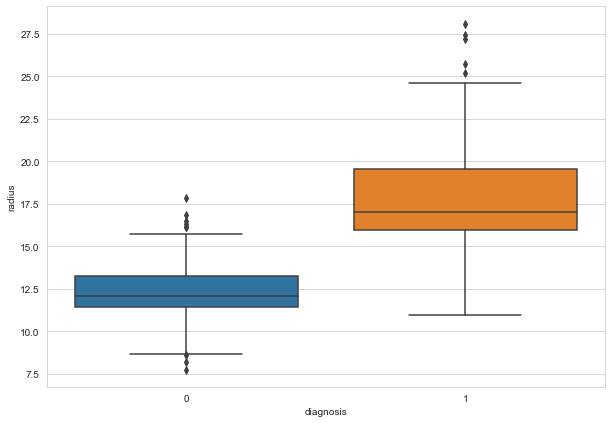

In [42]:
plt.figure(figsize=(10,7))
sns.boxplot(x="diagnosis",y="radius",data=bcd)

## Data Cleaning

In [11]:
bcd.groupby("diagnosis")["radius"].mean()

diagnosis
0    12.340825
1    17.896629
Name: radius, dtype: float64

In [12]:
def impute_radius(cols):
    radius=cols[0]
    diagnosis=cols[1]
    
    if pd.isnull(radius):
        
        if diagnosis==0:
            return 12
        else:
            return 17
    else:
        return radius

In [13]:
bcd["radius"]=bcd[["radius","diagnosis"]].apply(impute_radius,axis=1)

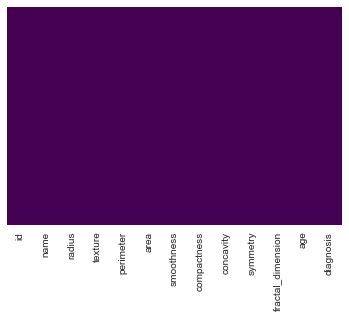

In [14]:
sns.heatmap(bcd.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [15]:
bcd.head()


,id,name,radius,texture,perimeter,area,smoothness,compactness,concavity,symmetry,fractal_dimension,age,diagnosis
0,ID842302,Glynnis Munson,17.00,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.2419,0.07871,35,1
1,ID842517,Lana Behrer,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.1812,0.05667,27,1
2,ID84300903,Devondra Vanvalkenburgh,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.2069,0.05999,31,1
3,ID84348301,Glory Maravalle,17.00,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.2597,0.09744,49,1
4,ID84358402,Mellie Mccurdy,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.1809,0.05883,20,1


In [17]:
bcd.drop(["id","name",],axis=1,inplace=True)

In [18]:
bcd.head()

,radius,texture,perimeter,area,smoothness,compactness,concavity,symmetry,fractal_dimension,age,diagnosis
0,17.00,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.2419,0.07871,35,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.1812,0.05667,27,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.2069,0.05999,31,1
3,17.00,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.2597,0.09744,49,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.1809,0.05883,20,1


## Building the Model

In [19]:
X = bcd.drop("diagnosis",axis=1)
y = bcd["diagnosis"]

In [21]:
X.head()

,radius,texture,perimeter,area,smoothness,compactness,concavity,symmetry,fractal_dimension,age
0,17.00,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.2419,0.07871,35
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.1812,0.05667,27
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.2069,0.05999,31
3,17.00,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.2597,0.09744,49
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.1809,0.05883,20


In [23]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=43)

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
logmodel = LogisticRegression()

In [29]:
logmodel.fit(X_train,y_train)

C:\Users\chike\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## Predictions and Evaluations

In [33]:
predictions=logmodel.predict(X_test)

In [34]:
from sklearn.metrics import classification_report

In [35]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       114
           1       0.86      0.88      0.87        57

    accuracy                           0.91       171
   macro avg       0.90      0.90      0.90       171
weighted avg       0.91      0.91      0.91       171



In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
confusion_matrix(y_test,predictions)

array([[106,   8],
       [  7,  50]], dtype=int64)